# Figure 1: Three Scenarios Layout
## Urban Sunset Precipitation Enhancement Study (2001-2020)

This notebook creates a comprehensive figure with:
- Top row: Global map with temporal stability inset
- Middle row: Urban-rural comparisons for three intensity scenarios
- Bottom row: Urban-only events for three intensity scenarios

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings

warnings.filterwarnings("ignore")

# Enable autoreload
%load_ext autoreload
%autoreload 2

# Import component functions
from figure1_components import (
    create_global_map_only,
    create_temporal_stability_inset,
    create_urban_rural_comparison,
    create_urban_only_events,
)

# Import data loader functions
from data_loader import (
    load_temporal_data,
    get_intensity_label,
    get_y_axis_limits,
    load_spatial_data,
    temporal_stability,
    COLORS,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Load all data
temporal_data = load_temporal_data("../data")
spatial_2020 = load_spatial_data("../data", 2020)

print(f"Data loaded successfully")
print(f"Cities in 2020: {len(spatial_2020)}")
print(f"Average enhancement: {temporal_stability['enhancement_pct'].mean():.1f}%")
print(f"\nAvailable intensity categories:")
for key in ["low", "moderate", "other"]:
    print(f"  - {key}: {get_intensity_label(key)}")

Data loaded successfully
Cities in 2020: 514
Average enhancement: 12.0%

Available intensity categories:
  - low: 0.2-0.5 mm/hr
  - moderate: 0.5-1 mm/hr
  - other: >1 mm/hr


In [5]:
# Check data ranges to debug visualization
print("Data ranges for each intensity:")
for intensity in ["low", "moderate", "other"]:
    print(f"\n{intensity.upper()} ({get_intensity_label(intensity)}):")
    data = temporal_data[intensity]

    # Urban-rural comparison data
    urban_vals = data["urban"]["mean"]
    rural_vals = data["rural"]["mean"]
    print(f"  Urban range: {urban_vals.min():.3f} - {urban_vals.max():.3f}")
    print(f"  Rural range: {rural_vals.min():.3f} - {rural_vals.max():.3f}")

    # Urban-only events data
    turban_vals = data["turban"]["mean"]
    print(f"  Urban-only range: {turban_vals.min():.3f} - {turban_vals.max():.3f}")

    # Y-axis limits
    y_lim_ur, y_ticks_ur = get_y_axis_limits(intensity, "urban_rural")
    y_lim_tu, y_ticks_tu = get_y_axis_limits(intensity, "turban")
    print(f"  Urban-rural Y limits: {y_lim_ur}")
    print(f"  Urban-only Y limits: {y_lim_tu}")

Data ranges for each intensity:

LOW (0.2-0.5 mm/hr):
  Urban range: 7.554 - 9.611
  Rural range: 7.248 - 8.500
  Urban-only range: 3.049 - 4.065
  Urban-rural Y limits: (6.8, 9.8)
  Urban-only Y limits: (2.8, 4.2)

MODERATE (0.5-1 mm/hr):
  Urban range: 5.860 - 7.428
  Rural range: 5.638 - 7.146
  Urban-only range: 0.993 - 1.201
  Urban-rural Y limits: (5, 8)
  Urban-only Y limits: (0.9, 1.3)

OTHER (>1 mm/hr):
  Urban range: 9.972 - 15.039
  Rural range: 9.892 - 15.120
  Urban-only range: 0.418 - 0.588
  Urban-rural Y limits: (8, 16)
  Urban-only Y limits: (0.3, 0.7)


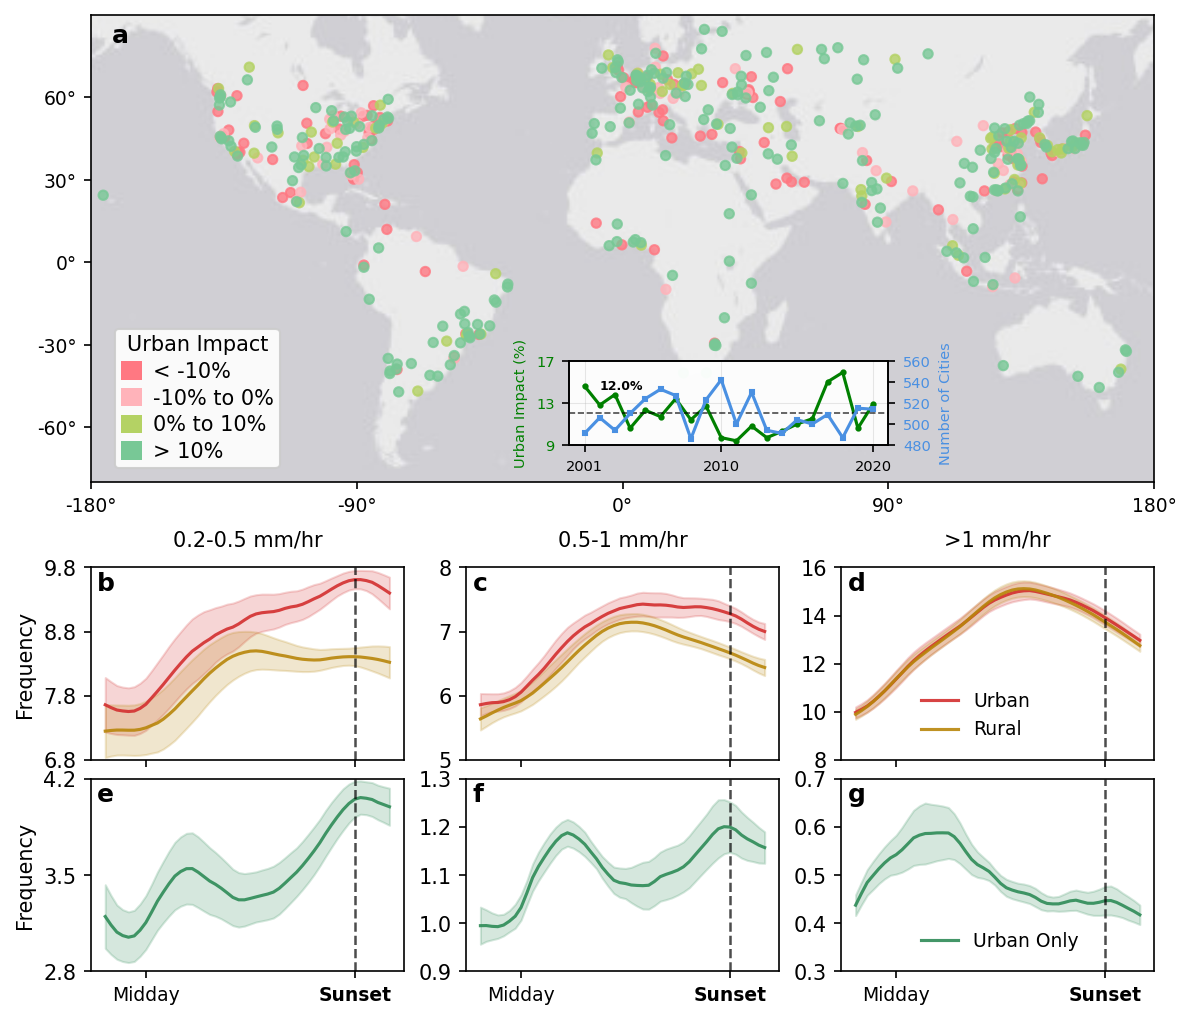

Three scenarios layout figure saved to ../figures/figure1_three_scenarios_layout.pdf and .png


In [11]:
# ===============================================
# CREATE THREE SCENARIOS FIGURE
# ===============================================

# Figure size and DPI
fig_width = 20 / 2.54  # cm to inches
fig_height = 18 / 2.54  # cm to inches (taller for 3 rows)
fig_dpi = 150

# Create figure with custom layout - 3 rows
fig = plt.figure(figsize=(fig_width, fig_height), dpi=fig_dpi)

# Use GridSpec for more control - create separate grids for different spacing
# Top grid for map (row 0)
gs_top = gridspec.GridSpec(
    1,
    1,
    left=0.05,
    right=0.95,
    top=0.95,
    bottom=0.51,
)  # Map takes top portion

# Bottom grid for the two comparison rows (rows 1-2)
gs_bottom = gridspec.GridSpec(
    2,
    3,
    height_ratios=[1, 1],
    width_ratios=[1, 1, 1],
    hspace=0.1,  # Small gap between row 2 and 3
    wspace=0.2,
    left=0.05,
    right=0.95,
    top=0.43,
    bottom=0.05,
)  # Leave gap from map

# ========== TOP ROW: Global Map with Temporal Inset ==========
ax_map = fig.add_subplot(gs_top[0, 0])

# Create map with your tweaked settings - aspect='auto' to fill the whole width
map_enhancement_pct = create_global_map_only(
    ax_map,
    spatial_2020,
    COLORS,
    legend_position=(0.1, 0.18),
    legend_fontsize=10,
    legend_markerscale=1.0,
    aspect="auto",  # This allows the map to stretch to fill the entire width
)

# Add temporal inset with your tweaked position
inset_position = [0.45, 0.08, 0.3, 0.18]  # Your tweaked position
inset_ax, inset_ax2 = create_temporal_stability_inset(ax_map, temporal_stability, inset_position)

# ========== SECOND ROW: Urban-Rural Comparison for 3 intensity scenarios ==========
intensities = ["low", "moderate", "other"]

for i, intensity in enumerate(intensities):
    ax = fig.add_subplot(gs_bottom[0, i])  # First row of bottom grid
    data = temporal_data[intensity]
    y_lim, y_ticks = get_y_axis_limits(intensity, "urban_rural")

    # Control visibility of elements based on position
    show_legend = i == 2  # Only last column shows legend
    show_ylabel = i == 0  # Only first column shows y-label
    show_title = True  # All show titles
    show_xlabel = False  # No x-labels (shared with row below)

    create_urban_rural_comparison(
        ax,
        data["urban"]["mean"],
        data["urban"]["low"],
        data["urban"]["high"],
        data["rural"]["mean"],
        data["rural"]["low"],
        data["rural"]["high"],
        COLORS,
        intensity_label=get_intensity_label(intensity),
        y_lim=y_lim,
        y_ticks=y_ticks,
        show_legend=show_legend,
        show_title=show_title,
        show_ylabel=show_ylabel,
        show_xlabel=show_xlabel,
    )

# ========== THIRD ROW: Urban-Only Events for 3 intensity scenarios ==========
for i, intensity in enumerate(intensities):
    ax = fig.add_subplot(gs_bottom[1, i])  # Second row of bottom grid
    data = temporal_data[intensity]
    y_lim, y_ticks = get_y_axis_limits(intensity, "turban")

    # Control visibility of elements based on position
    show_legend = i == 2  # Only last column shows legend
    show_ylabel = i == 0  # Only first column shows y-label
    show_title = False  # No titles (already shown in row above)
    show_xlabel = True  # All show x-labels

    create_urban_only_events(
        ax,
        data["turban"]["mean"],
        data["turban"]["low"],
        data["turban"]["high"],
        COLORS,
        intensity_label=f"Urban-Only: {get_intensity_label(intensity)}",
        y_lim=y_lim,
        y_ticks=y_ticks,
        show_legend=show_legend,
        show_title=show_title,
        show_ylabel=show_ylabel,
        show_xlabel=show_xlabel,
    )

# Add panel labels
panels = [ax_map]  # Panel 'a' for the map
# Get all axes from the figure in order
for ax in fig.axes[1:]:  # Skip the first axis (map) and any inset axes
    if ax not in [inset_ax, inset_ax2]:  # Skip the inset axes
        panels.append(ax)

labels = ["a", "b", "c", "d", "e", "f", "g"]  # 'a' for map, 'b-d' for row 2, 'e-g' for row 3
for ax, label in zip(panels, labels):
    _ = ax.text(
        0.02,
        0.98,
        label,
        transform=ax.transAxes,
        fontsize=12,
        fontweight="bold",
        va="top",
        ha="left",
    )

# No need for tight_layout as we manually positioned everything
plt.show()

# Save figure
fig.savefig("figure1_three_scenarios_layout.pdf", dpi=300, bbox_inches="tight")
fig.savefig("figure1_three_scenarios_layout.png", dpi=300, bbox_inches="tight")
print(
    "Three scenarios layout figure saved to ../figures/figure1_three_scenarios_layout.pdf and .png"
)